In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import skimage
from skimage import data
from matplotlib import pyplot as plt
import matplotlib as mpl

# %pylab inline
class MidpointNormalize(mpl.colors.Normalize):
    """
    class to help renormalize the color scale
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))




Bad key text.latex.preview in file /home/spock-the-wizard/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.4/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/spock-the-wizard/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.4/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/spock-the-wizard/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_

In [2]:
import os
from PIL import Image
import numpy as np

grad1 = f"examples/python/scripts/grad/test_was_v0/cone4_4.npy"
scene="head1"
sensor=30
grad1 = f"examples/python/scripts/grad/test_was_v0/{scene}_{sensor}.npy"
grad1_gt = f"examples/grad2/{scene}_sensor{sensor}_sigma_t[[52, 52, 52]]_param2_VaeSub_delta5_FD_nolegend.png"
grad1_img = f"examples/grad2/{scene}_sensor{sensor}_sigma_t[[52, 52, 52]]_param2_VaeSub_delta5_FD_1.png"

img = np.load(grad1)[...,None]
img_gt = Image.open(grad1_gt)
img_img = Image.open(grad1_img)

img *= 1000
img.shape
img[img!=0]
print(img.max())
print(img.min())
# tmp = img.astype('float64')
# tmp.max()
# np.unique(img)

0.07623015456677724
-0.05665153730660677


0.07623015456677724


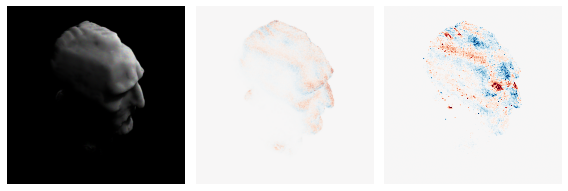

In [3]:
thres = 0.006510 #50151

from mpl_toolkits.axes_grid1 import make_axes_locatable

# img *= 10000
cmax = max(img.max(),abs(img.min()))
print(cmax)
# img[img>thres] = thres
# img[img<-thres] = -thres

# img[img >0.0] = +1.0
# img[img<0.0] = -1.0
# print(np.unique(img))
cmax = min(cmax,thres)
norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)

f, axarr = plt.subplots(nrows=1, ncols=3, figsize=(8,8), tight_layout=True)
axarr[0].imshow(img_img)
axarr[0].axis('off')
axarr[1].imshow(img_gt)
axarr[1].axis('off')

img_ = axarr[2].imshow(img,cmap='RdBu_r',norm=norm)
axarr[2].axis('off')
plt.show()

4
0.032128725
0.009789138101041317
0.027949894
0.006830222904682159
0.026455829
0.00825132243335247
0.03670908
0.008877396583557129


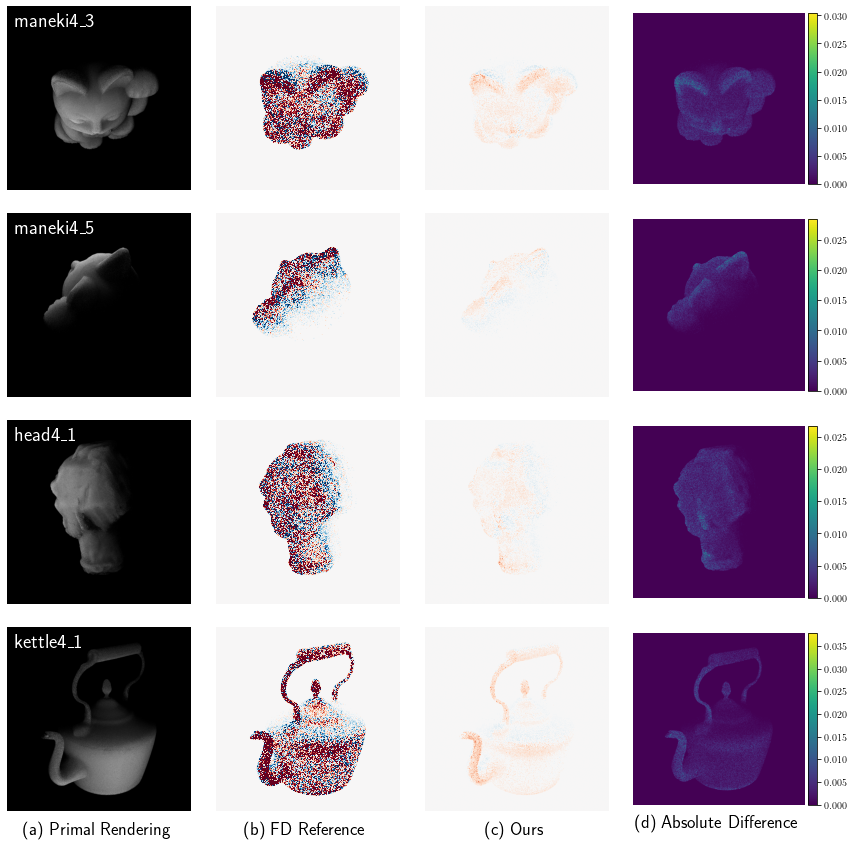

In [935]:
import os
from PIL import Image
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
delta=5
sigmaT = 80 #52
sigmaT = 50 #52
exp=266
exp2=exp
# exp2=76
grad_dir = "grad2" if exp<36 else "grad3"
suffix="basic"
# suffix="plane"
suffix="all"
# suffix="complex"
grad_dirs = ["grad2",]
scenes = ['cube','plane','cone4','sphere1','cylinder4','pyramid4']
# scenes = ['plane']
scenes = ['head1','kettle1','duck','maneki1','pig1','horse','botijo','cube','plane','cone4','sphere1','cylinder4','pyramid4']
# scenes=['head1','kettle1','duck','maneki1','pig1','horse','botijo']
scenes = ['maneki4','head4','kettle4',] 
sensors = np.arange(50)
# sensors = [2,22]
list_imgs = []
list_grad_fds = []
list_grads = []
list_fds = []
list_scenes = []

for scene in scenes:
    for sensor in sensors:
        for grad_dir in grad_dirs:
            if exp <= 131:
                grad = f"examples/python/scripts/grad/test_was_v{exp}/{scene}_{sensor}.npy"
                grad_fd = f"examples/python/scripts/grad/test_was_v{exp2}/{scene}_{sensor}_fd.npy"
            else:
                grad = f"examples/python/scripts/grad/test_was_v{exp}/{scene}_{sensor}_{delta}.npy"
                grad_fd = f"examples/python/scripts/grad/test_was_v{exp2}/{scene}_{sensor}_{delta}_fd.npy"
                
            fd = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_VaeSub_delta{delta}_FD_nolegend.png"
            img = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_VaeSub_delta{delta}_FD_0.png"
            # fd = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_HeterSub_delta{delta}_FD_nolegend.png"
            # img = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_HeterSub_delta{delta}_FD_0.png"
            if not os.path.exists(grad_fd) or not os.path.exists(img) or not os.path.exists(grad):
                continue
            grad_ = np.load(grad)[...,None]
            grad_fd = np.load(grad_fd)[...,None]
            
            img_ = Image.open(img)
            list_grads.append(grad_)
            list_grad_fds.append(grad_fd)
            # list_fds.append(fd_)
            list_imgs.append(img_)
            list_scenes.append((scene,sensor))
print(len(list_imgs))
plt.rcParams['text.usetex'] = True
f, axarr = plt.subplots(nrows=len(list_imgs), ncols=4, figsize=(3*4,len(list_imgs)*3), tight_layout=True)
for idx,(img,fd,grad) in enumerate(zip(list_imgs,list_grad_fds,list_grads)):
    name,sensor = list_scenes[idx]
    # print(idx)
    axarr[idx,0].imshow(img)
    # print(name)
    axarr[idx,0].text(20,17,f"{name}_{sensor}",fontsize=20, color='white', ha='left', va='top')
   
    thres = 0.00116510 #50151
    cmax = max(fd.max(),abs(fd.min()))
    print(cmax)
    cmax = min(cmax,thres)
    norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)
    axarr[idx,1].imshow(fd,cmap='RdBu_r',norm=norm)

    thres = 0.006 #50151   
    # grad = grad / 0.05
    cmax = max(grad.max(),abs(grad.min()))
    print(cmax)
    cmax = min(cmax,thres)
    # cmax=thres
    norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)
    axarr[idx,2].imshow(grad,cmap='RdBu_r',norm=norm)
     
    diff = abs(grad-fd)
    # norm = MidpointNormalize(vmin=-diff.max(),vmax=diff.max(),midpoint=0.0)
    divider = make_axes_locatable(axarr[idx,3])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    im = axarr[idx,3].imshow(diff,cmap='viridis') #,norm=norm)
    f.colorbar(im, cax=cax, orientation='vertical')
    
    axarr[idx,0].axis('off')
    axarr[idx,1].axis('off')
    axarr[idx,2].axis('off')
    axarr[idx,3].axis('off')
    
# axarr[idx,0].text(0,199,'hi',horizon)
fs = 18
idx = len(list_imgs)-1
axarr[idx,0].text(250,540,f"(a) Primal Rendering",fontsize=fs, ha='center', va='top')
axarr[idx,1].text(250,540,f"(b) FD Reference",fontsize=fs, ha='center', va='top')
if exp in [175]:
    axarr[idx,2].text(250,540,f"(c) Deng",fontsize=fs, ha='center', va='top')
else:
    axarr[idx,2].text(250,540,f"(c) Ours",fontsize=fs, ha='center', va='top')
axarr[idx,3].text(250,540,f"(d) Absolute Difference",fontsize=fs, ha='center', va='top')
plt.show()
f.savefig(f'was_v{exp}_{suffix}_{sigmaT}_{delta}.png')

## FD with fixed random seed

0.5464847
0.52220947
0.8341954
0.85849744
0.7373478
0.747474
0.69402677
0.71270925
4
[('maneki4', 1), ('maneki4', 3), ('head4', 1), ('kettle4', 1)]
0.020321712 -1.7623966e-05 0.0005967749
0.004470571409910917 -2.242548717805183e-05 0.00020472301625352118
0.037116412 2.8670069e-05 0.0014095049
0.013063262527187666 4.700027900703226e-05 0.0005094139050062772
0.022367645 1.8543891e-05 0.0012761911
0.009297441535939774 2.859488484109161e-05 0.0004628925578551459
0.027658772 5.780293e-05 0.0014876055
0.013757667938383141 9.341279492960981e-05 0.0005648260513663988


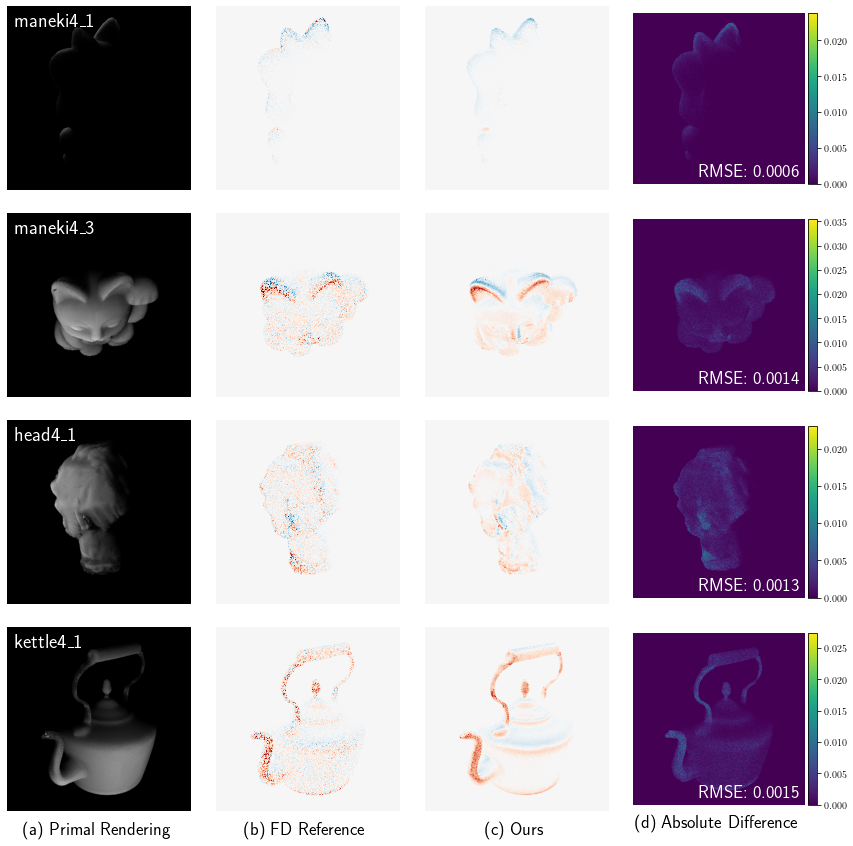

In [1034]:
import os
from PIL import Image
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
delta=5
sigmaT = 80 #52
sigmaT = 50 #52
exp=271
exp2=exp
# exp2=76
grad_dir = "grad2" if exp<36 else "grad3"
suffix="basic"
# suffix="plane"
suffix="all"
# suffix="complex"
grad_dirs = ["grad2",]
scenes = ['cube','plane','cone4','sphere1','cylinder4','pyramid4']
# scenes = ['plane']
scenes = ['head1','kettle1','duck','maneki1','pig1','horse','botijo','cube','plane','cone4','sphere1','cylinder4','pyramid4']
# scenes=['head1','kettle1','duck','maneki1','pig1','horse','botijo']
scenes = ['maneki4','head4','kettle4','botijo2',] 
# scenes =  ['head4']
sensors = np.arange(50)
# sensors = [2,22]
list_imgs = []
list_grad_fds = []
list_grads = []
list_fds = []
list_scenes = []

            
for scene in scenes:
    for sensor in sensors:
        for grad_dir in grad_dirs:
            if exp <= 131:
                grad = f"examples/python/scripts/grad/test_was_v{exp}/{scene}_{sensor}.npy"
                grad_fd = f"examples/python/scripts/grad/test_was_v{exp2}/{scene}_{sensor}_fd.npy"
            else:
                grad = f"examples/python/scripts/grad/test_was_v{exp}/{scene}_{sensor}_{delta}.npy"
                grad_fd0 = f"examples/python/scripts/grad/test_was_v{exp2}/{scene}_{sensor}_{delta}_fd_0.npy"
                grad_fd1 = f"examples/python/scripts/grad/test_was_v{exp2}/{scene}_{sensor}_{delta}_fd_1.npy"
                
            fd = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_VaeSub_delta{delta}_FD_nolegend.png"
            img = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_VaeSub_delta{delta}_FD_0.png"
            # fd = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_HeterSub_delta{delta}_FD_nolegend.png"
            # img = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_HeterSub_delta{delta}_FD_0.png"
            if not os.path.exists(grad_fd0) or not os.path.exists(grad_fd1) or not os.path.exists(grad):
                continue
            grad_ = np.load(grad)[...,None]
            grad_fd0 = np.load(grad_fd0)[...,None]
            grad_fd1 = np.load(grad_fd1)[...,None]
            print(grad_fd0.max())
            print(grad_fd1.max())
            grad_fd = grad_fd1 - grad_fd0
            grad_fd /= 5.0*2.0
            
            img_ = Image.open(img)
            list_grads.append(grad_)
            list_grad_fds.append(grad_fd)
            # list_fds.append(fd_)
            # list_imgs.append(img_)
            # print(np.uint8(grad_fd0).shape)
            im = Image.fromarray((grad_fd0.squeeze())*255)
            list_imgs.append(im)
            list_scenes.append((scene,sensor))
print(len(list_imgs))
print(list_scenes)
plt.rcParams['text.usetex'] = True
f, axarr = plt.subplots(nrows=len(list_imgs), ncols=4, figsize=(3*4,len(list_imgs)*3), tight_layout=True)
for idx,(img,fd,grad) in enumerate(zip(list_imgs,list_grad_fds,list_grads)):
    name,sensor = list_scenes[idx]
    # print(idx)
    axarr[idx,0].imshow(img,cmap=None)
    # print(name)
    axarr[idx,0].text(20,17,f"{name}_{sensor}",fontsize=20, color='white', ha='left', va='top')
   
    thres = 0.00616510 #50151
    cmax = max(fd.max(),abs(fd.min()))
    print(fd.max(),fd.mean(),fd.std())
    cmax = min(cmax,thres)
    norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)
    axarr[idx,1].imshow(fd,cmap='RdBu_r',norm=norm)

    # thres = 0.0000000001 #50151   
    # cmax = max(grad.max(),abs(grad.min()))
    # cmax = min(cmax,thres)
    # # print(cmax)
    print(grad.max(), grad.mean() , grad.std())
    # # cmax = min(cmax,thres)
    # # cmax=thres
    # norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)
    axarr[idx,2].imshow(grad,cmap='RdBu_r',norm=norm)
     
    diff = abs(grad-fd)
    # print('diff', diff.mean())
    # norm = MidpointNormalize(vmin=-diff.max(),vmax=diff.max(),midpoint=0.0)
    divider = make_axes_locatable(axarr[idx,3])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    im = axarr[idx,3].imshow(diff,cmap='viridis') #,norm=norm)
    f.colorbar(im, cax=cax, orientation='vertical')
    rmse = np.sqrt(np.mean((grad-fd)**2))
    axarr[idx,3].text(500,500,f"RMSE: {rmse:.4f}",fontsize=fs ,ha='right', va='bottom',color='white')
    
    axarr[idx,0].axis('off')
    axarr[idx,1].axis('off')
    axarr[idx,2].axis('off')
    axarr[idx,3].axis('off')
    
# axarr[idx,0].text(0,199,'hi',horizon)
fs = 18
idx = len(list_imgs)-1
axarr[idx,0].text(250,540,f"(a) Primal Rendering",fontsize=fs, ha='center', va='top')
axarr[idx,1].text(250,540,f"(b) FD Reference",fontsize=fs, ha='center', va='top')
if exp in [175]:
    axarr[idx,2].text(250,540,f"(c) Deng",fontsize=fs, ha='center', va='top')
else:
    axarr[idx,2].text(250,540,f"(c) Ours",fontsize=fs, ha='center', va='top')
axarr[idx,3].text(250,540,f"(d) Absolute Difference",fontsize=fs, ha='center', va='top')

plt.show()
f.savefig(f'was_v{exp}_{suffix}_{sigmaT}_{delta}_betterFD.png')

In [982]:
def read_float_array_from_file(file_path):
    with open(file_path, 'r') as file:
        return [float(line.strip()) for line in file]

def compute_differences(array1, array2):
    return [abs((a if a!=np.nan else 0) - b) for a, b in zip(array1, array2)]

def sort_differences_with_indices(differences):
    return sorted(enumerate(differences), key=lambda x: x[1], reverse=True)

def compute_total_sum(differences):
    return sum(differences)

def main(file1, file2):
    array1 = read_float_array_from_file(file1)
    array2 = read_float_array_from_file(file2)

    if len(array1) != len(array2):
        print("Error: The files must contain the same number of floats.")
        return

    differences = compute_differences(array1, array2)
    total_sum = compute_total_sum(differences)
    sorted_differences = sort_differences_with_indices(differences)

    print(f"Total sum of differences: {total_sum}")
    print("Index of elements with the largest differences:")
    print(sorted_differences[:100])
    # for index, difference in sorted_differences:
    #     print(f"Index: {index}, Difference: {difference}")

if __name__ == "__main__":
    file1 = '/home/spock-the-wizard/slurm/sss-relighting/InverseTranslucent/examples/python/scripts/f_fd_0.txt'
    file2 = '/home/spock-the-wizard/slurm/sss-relighting/InverseTranslucent/examples/python/scripts/f_minus_copy.txt'
    file1 = '/home/spock-the-wizard/slurm/sss-relighting/InverseTranslucent/examples/python/scripts/[exp] off_/off_minus.txt'
    file2 = '/home/spock-the-wizard/slurm/sss-relighting/InverseTranslucent/examples/python/scripts/[exp] off_/off_0.txt'
    
    # position difference
    file1 = 'debug/1/off_0.txt'
    file2 = 'debug/1/off_minus.txt'
    
    # value difference
    file1 = 'debug/1/f_0.txt'
    file2 = 'debug/1/f_minus.txt'
    
#     # active difference
#     file1 = 'debug/2/f_1.txt'
#     file2 = 'debug/2/f_minus.txt'
    
#     file1 = 'debug/2/f_0.txt'
#     file2 = 'debug/2/f_plus.txt'

# pdfpoint and active
    file1 = 'debug/3/f_1.txt'
    file2 = 'debug/3/f_plus.txt'
    file1 = 'debug/3/f_0.txt'
    file2 = 'debug/3/f_minus.txt'
    
    # Le and pdfpoint and active: difference in pos propagates to Le
    file1 = 'debug/4/off_1.txt'
    file2 = 'debug/4/off_plus.txt'
    # file1 = 'debug/4/f_1.txt'
    # file2 = 'debug/4/f_plus.txt'
    # file1 = 'debug/4/f_0.txt'
    # file2 = 'debug/4/f_minus.txt'
    
    
    file1 = 'debug/5/off_1.txt'
    file2 = 'debug/5/off_plus.txt'
    file1 = 'debug/5/off_0.txt'
    file2 = 'debug/5/off_minus.txt'
    
    file1 = 'debug/6/mate_0.txt'
    file2 = 'debug/6/mate_minus.txt'
    file1 = 'debug/6/mate_1.txt'
    file2 = 'debug/6/mate_plus.txt'
    
    # vae output
    file1 = 'debug/7/f_1.txt'
    file2 = 'debug/7/f_plus.txt'
    file1 = 'debug/7/vae_1.txt'
    file2 = 'debug/7/vae_0.txt'
    
    # seed check
    file1 = 'debug/8/samples_0.txt'
    file2 = 'debug/8/samples_.txt'
    
    # camera ray
    # cause was conversion btw Ctype and Dtype (CudaArray)
    file1 = 'debug/9/its_0.txt'
    file2 = 'debug/9/its_Ctype.txt'
    
    # fixed samples for bs
    file1 = 'debug/10/off_1.txt'
    file2 = 'debug/10/off_minus.txt'  
    
    # fixed samples for bs
    file1 = 'debug/11/off_0_.txt'
    file2 = 'debug/11/off_plus.txt'
    
    # file1 = 'debug/11/off_1.txt'
    # file2 = 'debug/11/off_plus.txt'
    
    # file1 = 'debug/11/vae_0.txt'
    # file2 = 'debug/11/vae_.txt'
    
    # fixed samples for bs
    file1 = 'debug/12/f_0.txt'
    file2 = 'debug/12/f_minus.txt'
    main(file1, file2)


Total sum of differences: 24394.745643720005
Index of elements with the largest differences:
[(155246, 1.06979), (106115, 1.03868), (106117, 1.03324), (156272, 1.02671), (106119, 1.02208), (106136, 1.02066), (111793, 1.01973), (150124, 1.01507), (106114, 1.01401), (105094, 1.01243), (156776, 1.01072), (100487, 1.00248), (105607, 1.00154), (153199, 0.99666), (104577, 0.993101), (100998, 0.992971), (105599, 0.991706), (104584, 0.990483), (103044, 0.988487), (101052, 0.984713), (116930, 0.981541), (99515, 0.980322), (114815, 0.977237), (106137, 0.975955), (156269, 0.974576), (150125, 0.974036), (102078, 0.972527), (104075, 0.971103), (99980, 0.970177), (104067, 0.968787), (104073, 0.967817), (105096, 0.967625), (116416, 0.966227), (159345, 0.965541), (157795, 0.964373), (155252, 0.96378), (105684, 0.962662), (115840, 0.960366), (99470, 0.959917), (104578, 0.959582), (103556, 0.959093), (106622, 0.957657), (107650, 0.957555), (112765, 0.955337), (108165, 0.953392), (104582, 0.952405), (150

In [748]:
def read_float_array_from_file(file_path):
    with open(file_path, 'r') as file:
        return [float(line.strip()) for line in file]

def compute_differences(array1, array2):
    return [abs(a - b) for a, b in zip(array1, array2)]

def sort_differences_with_indices(differences):
    return sorted(enumerate(differences), key=lambda x: x[1], reverse=True)

def compute_total_sum(differences):
    return sum(differences)

def main(file1, file2):
    array1 = read_float_array_from_file(file1)
    array2 = read_float_array_from_file(file2)

    if len(array1) != len(array2):
        print("Error: The files must contain the same number of floats.")
        return

    differences = compute_differences(array1, array2)
    total_sum = compute_total_sum(differences)
    sorted_differences = sort_differences_with_indices(differences)

    print(f"Total sum of differences: {total_sum}")
    print("Index of elements with the largest differences:")
    print(sorted_differences[:100])
    # for index, difference in sorted_differences:
    #     print(f"Index: {index}, Difference: {difference}")

if __name__ == "__main__":
    file1 = '/home/spock-the-wizard/slurm/sss-relighting/InverseTranslucent/examples/python/scripts/f_fd_1.txt'
    file2 = '/home/spock-the-wizard/slurm/sss-relighting/InverseTranslucent/examples/python/scripts/f_plus_copy.txt'
    main(file1, file2)


Total sum of differences: 0.025383814779997703
Index of elements with the largest differences:
[(185090, 0.0013179999999999858), (187135, 0.0006179999999999797), (185091, 0.0002808000000000012), (109202, 0.00023499999999998522), (101686, 0.00015500000000001624), (181522, 0.00012999999999996348), (183561, 0.0001229999999999981), (186626, 0.00011200000000000099), (186092, 9.900000000001574e-05), (156993, 9.899999999998799e-05), (110862, 9.700000000001374e-05), (185589, 9.399999999992747e-05), (108699, 9.100000000000774e-05), (184555, 8.900000000000574e-05), (183570, 7.80000000000225e-05), (184593, 7.499999999999174e-05), (185058, 7.299999999998974e-05), (162983, 7.100000000004325e-05), (187634, 7.100000000004325e-05), (187137, 6.899999999998574e-05), (178945, 6.20000000000065e-05), (181468, 6.20000000000065e-05), (187141, 5.8000000000002494e-05), (183038, 5.699999999997374e-05), (186101, 5.699999999997374e-05), (187110, 5.6000000000000494e-05), (186606, 5.299999999996974e-05), (204005, 5

In [750]:
def read_float_array_from_file(file_path):
    with open(file_path, 'r') as file:
        return [float(line.strip()) for line in file]

def compute_differences(array1, array2):
    return [abs(a - b) for a, b in zip(array1, array2)]

def sort_differences_with_indices(differences):
    return sorted(enumerate(differences), key=lambda x: x[1], reverse=True)

def compute_total_sum(differences):
    return sum(differences)

def main(file1, file2):
    array1 = read_float_array_from_file(file1)
    array2 = read_float_array_from_file(file2)

    if len(array1) != len(array2):
        print("Error: The files must contain the same number of floats.")
        return

    differences = compute_differences(array1, array2)
    total_sum = compute_total_sum(differences)
    sorted_differences = sort_differences_with_indices(differences)

    print(f"Total sum of differences: {total_sum}")
    print("Index of elements with the largest differences:")
    print(sorted_differences[:100])
    # for index, difference in sorted_differences:
    #     print(f"Index: {index}, Difference: {difference}")

if __name__ == "__main__":
    file1 = '/home/spock-the-wizard/slurm/sss-relighting/InverseTranslucent/examples/python/scripts/f_fd_0_bsdf.txt'
    file2 = '/home/spock-the-wizard/slurm/sss-relighting/InverseTranslucent/examples/python/scripts/f_minus_bsdf.txt'
    main(file1, file2)

Total sum of differences: 0.005044588079999989
Index of elements with the largest differences:
[(186117, 0.0008042999999999939), (185090, 0.00032306), (185604, 0.00010369999999999824), (185096, 3.589999999999843e-05), (185599, 3.400000000000625e-05), (100237, 2.590000000000231e-05), (184541, 2.3799999999997434e-05), (184601, 2.2000000000001185e-05), (184047, 1.8799999999999373e-05), (108699, 1.7699999999998967e-05), (183560, 1.4500000000000624e-05), (189224, 1.3399999999996748e-05), (120593, 1.3100000000001999e-05), (187110, 1.3100000000001999e-05), (186606, 1.1499999999997623e-05), (183523, 1.0499999999996623e-05), (183032, 1.030000000000475e-05), (187634, 1.030000000000475e-05), (183555, 9.809999999999854e-06), (183048, 9.80000000000425e-06), (127368, 9.499999999999093e-06), (186630, 9.30000000000028e-06), (182530, 8.700000000000374e-06), (159938, 8.000000000008e-06), (165688, 7.699999999999374e-06), (150854, 7.599999999999968e-06), (130417, 7.499999999993623e-06), (179955, 7.4999999

In [753]:
def read_float_array_from_file(file_path):
    with open(file_path, 'r') as file:
        return [float(line.strip()) for line in file]

def compute_differences(array1, array2):
    return [abs(a - b) for a, b in zip(array1, array2)]

def sort_differences_with_indices(differences):
    return sorted(enumerate(differences), key=lambda x: x[1], reverse=True)

def compute_total_sum(differences):
    return sum(differences)

def main(file1, file2):
    array1 = read_float_array_from_file(file1)
    array2 = read_float_array_from_file(file2)

    if len(array1) != len(array2):
        print("Error: The files must contain the same number of floats.")
        return

    differences = compute_differences(array1, array2)
    total_sum = compute_total_sum(differences)
    sorted_differences = sort_differences_with_indices(differences)

    print(f"Total sum of differences: {total_sum}")
    print("Index of elements with the largest differences:")
    print(sorted_differences[:100])
    # for index, difference in sorted_differences:
    #     print(f"Index: {index}, Difference: {difference}")

if __name__ == "__main__":
    file1 = '/home/spock-the-wizard/slurm/sss-relighting/InverseTranslucent/examples/python/scripts/f_fd_1_bsdf.txt'
    file2 = '/home/spock-the-wizard/slurm/sss-relighting/InverseTranslucent/examples/python/scripts/f_plus_bsdf.txt'
    main(file1, file2)
# /home/spock-the-wizard/slurm/sss-relighting/InverseTranslucent/examples/python/scripts/f_fd_1_bsdf.txt

Total sum of differences: 0.004229740317000662
Index of elements with the largest differences:
[(185090, 0.0002474999999999977), (187135, 0.00011740000000000361), (185091, 5.257999999999999e-05), (109202, 3.3599999999994745e-05), (110862, 3.090000000000037e-05), (101686, 2.4599999999999622e-05), (181522, 2.3700000000001498e-05), (183561, 2.2799999999999904e-05), (186626, 2.1499999999993746e-05), (186092, 1.8500000000004624e-05), (185589, 1.8000000000004124e-05), (184555, 1.6499999999988746e-05), (156993, 1.5900000000002718e-05), (183570, 1.4500000000000624e-05), (185058, 1.359999999999903e-05), (187137, 1.3299999999993872e-05), (187634, 1.3299999999993872e-05), (108699, 1.2899999999996248e-05), (184593, 1.2299999999992872e-05), (187141, 1.1099999999999999e-05), (183038, 1.0999999999997123e-05), (186101, 1.0999999999997123e-05), (204005, 1.0700000000002374e-05), (187110, 1.0599999999999499e-05), (162983, 1.0200000000001874e-05), (186606, 9.900000000007125e-06), (178945, 9.00000000000206

In [703]:
import filecmp
 
f1_ = "/home/spock-the-wizard/slurm/sss-relighting/InverseTranslucent/examples/python/scripts/offset_ copy_minus_.txt"
f2_ = "/home/spock-the-wizard/slurm/sss-relighting/InverseTranslucent/examples/python/scripts/offset_minus copy.txt"
# f2= "/home/spock-the-wizard/slurm/sss-relighting/InverseTranslucent/examples/python/scripts/offset_ copy_plus_.txt"
 
def files_are_equal(file1, file2):
    
    count = 0
    try:
        with open(file1, 'r') as f1, open(file2, 'r') as f2:
            while True:
                count += 1
                chunk1 = f1.read(4096)
                chunk2 = f2.read(4096)
                # lines()[:100]
                # print(chunk1,ch/unk2)
                if chunk1 != chunk2:
                    print(count)
                    # print(chunk1)
                    # print(chunk2)
                    return False
                # print("reaches here")
                if not chunk1:  # End of file
                    return True
    except FileNotFoundError:
        print(f"Error: One of the files '{file1}' or '{file2}' was not found.")
        return False
    except IOError as e:
        print(f"Error: An I/O error occurred: {e}")
        return False

# Example usage
file1 = 'file1.txt'
file2 = 'file2.txt'

if files_are_equal(f1_,f2_): #ile1, file2):
    print("The files are equal.")
else:
    print("The files are not equal.")

# print(os.path.exists(f1))

# print(os.path.exists(f2))
# files_are_equal(f1_,f2_)

34
The files are not equal.


In [665]:
grad_fd0 = np.load(grad_fd0)[...,None]

FileNotFoundError: [Errno 2] No such file or directory: 'examples/python/scripts/grad/test_was_v257/botijo2_49_5_fd_0.npy'

### Manually check forward and negative sample difference (ours)

4
[('maneki4', 3), ('maneki4', 5), ('kettle4', 1), ('head4', 1)]
0.008996884
0.006250230595469475
0.005310471
0.004407275468111038
0.011501533
0.006665179505944252
0.0074392795
0.0063585881143808365


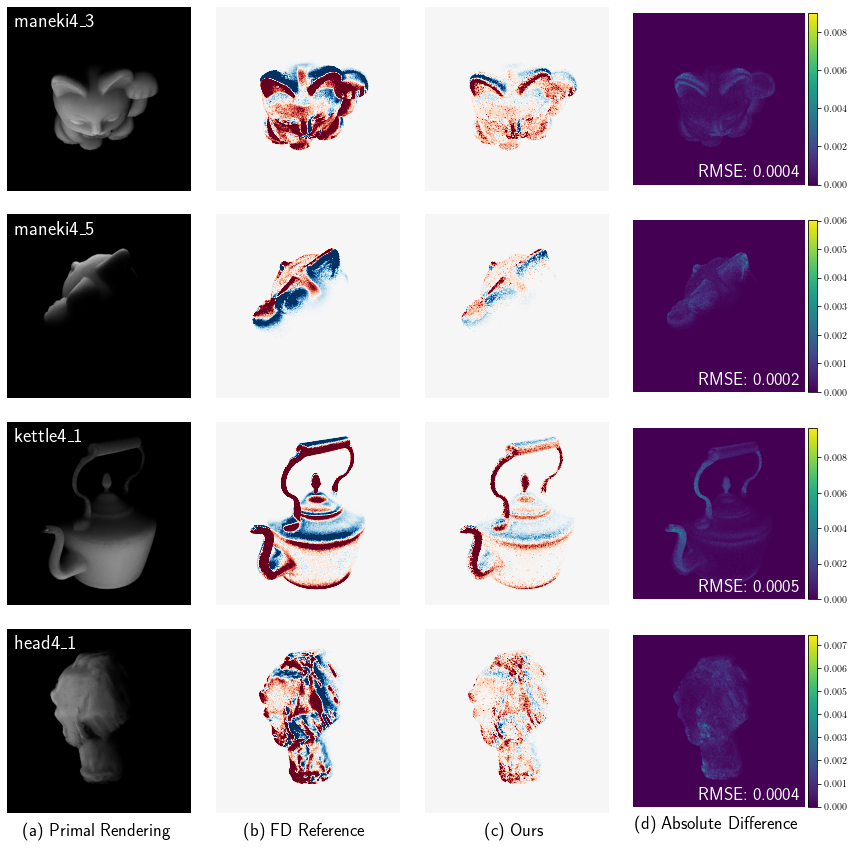

In [678]:
import os
from PIL import Image
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
delta=5
sigmaT = 80 #52
sigmaT = 50 #52
exp=250
exp2=exp
# exp2=76
grad_dir = "grad2" if exp<36 else "grad3"
suffix="basic"
# suffix="plane"
suffix="all"
# suffix="complex"
grad_dirs = ["grad2",]
scenes = ['cube','plane','cone4','sphere1','cylinder4','pyramid4']
# scenes = ['plane']
scenes = ['head1','kettle1','duck','maneki1','pig1','horse','botijo','cube','plane','cone4','sphere1','cylinder4','pyramid4']
# scenes=['head1','kettle1','duck','maneki1','pig1','horse','botijo']
scenes = ['maneki4','kettle4','head4',] 
# scenes =  ['head4']
sensors = np.arange(50)
# sensors = [2,22]
list_imgs = []
list_grad_fds = []
list_grads = []
list_fds = []
list_scenes = []
list_grad0 =[]
list_grad1 = []

for scene in scenes:
    for sensor in sensors:
        for grad_dir in grad_dirs:
            if exp <= 131:
                grad = f"examples/python/scripts/grad/test_was_v{exp}/{scene}_{sensor}.npy"
                grad_fd = f"examples/python/scripts/grad/test_was_v{exp2}/{scene}_{sensor}_fd.npy"
            else:
                grad = f"examples/python/scripts/grad/test_was_v{exp}/{scene}_{sensor}_{delta}.npy"
                
                grad_0 = f"examples/python/scripts/grad/test_was_v{251}/{scene}_{sensor}_{delta}.npy"
                grad_1 = f"examples/python/scripts/grad/test_was_v{252}/{scene}_{sensor}_{delta}.npy"
                grad_fd0 = f"examples/python/scripts/grad/test_was_v{exp2}/{scene}_{sensor}_{delta}_fd_0.npy"
                grad_fd1 = f"examples/python/scripts/grad/test_was_v{exp2}/{scene}_{sensor}_{delta}_fd_1.npy"
                
            fd = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_VaeSub_delta{delta}_FD_nolegend.png"
            img = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_VaeSub_delta{delta}_FD_0.png"
            # fd = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_HeterSub_delta{delta}_FD_nolegend.png"
            # img = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_HeterSub_delta{delta}_FD_0.png"
            if not os.path.exists(grad_fd0) or not os.path.exists(grad_fd1) or not os.path.exists(grad):
                continue
            grad_ = np.load(grad)[...,None]
            grad_fd0 = np.load(grad_fd0)[...,None]
            grad_fd1 = np.load(grad_fd1)[...,None]
            
            grad_0 = np.load(grad_0)[...,None]
            grad_1 = np.load(grad_1)[...,None]

            grad_fd = grad_fd1 - grad_fd0
            grad_fd /= 5.0*2
            list_grad0.append(grad_0)
            list_grad1.append(grad_1)
            img_ = Image.open(img)
            list_grads.append(grad_)
            list_grad_fds.append(grad_fd)
            # list_fds.append(fd_)
            list_imgs.append(img_)
            list_scenes.append((scene,sensor))
print(len(list_imgs))
print(list_scenes)
plt.rcParams['text.usetex'] = True
f, axarr = plt.subplots(nrows=len(list_imgs), ncols=4, figsize=(3*4,len(list_imgs)*3), tight_layout=True)
for idx,(img,fd,grad) in enumerate(zip(list_imgs,list_grad_fds,list_grads)):
    name,sensor = list_scenes[idx]
    # print(idx)
    axarr[idx,0].imshow(img)
    # print(name)
    axarr[idx,0].text(20,17,f"{name}_{sensor}",fontsize=20, color='white', ha='left', va='top')
   
    thres = 0.000616510 #50151
    cmax = max(fd.max(),abs(fd.min()))
    print(cmax)
    cmax = min(cmax,thres)
    norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)
    axarr[idx,1].imshow(fd,cmap='RdBu_r',norm=norm)

    # thres = 0.001 #50151   
    # grad = grad / 0.5
    grad = list_grad0[idx] - list_grad1[idx]
    cmax = max(grad.max(),abs(grad.min()))
    print(cmax)
    cmax = min(cmax,thres)
    # cmax=thres
    norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)
    axarr[idx,2].imshow(grad,cmap='RdBu_r',norm=norm)
     
    diff = abs(grad-fd)
    # norm = MidpointNormalize(vmin=-diff.max(),vmax=diff.max(),midpoint=0.0)
    divider = make_axes_locatable(axarr[idx,3])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    im = axarr[idx,3].imshow(diff,cmap='viridis') #,norm=norm)
    f.colorbar(im, cax=cax, orientation='vertical')
    rmse = np.sqrt(np.mean((grad-fd)**2))
    axarr[idx,3].text(500,500,f"RMSE: {rmse:.4f}",fontsize=fs ,ha='right', va='bottom',color='white')
    
    axarr[idx,0].axis('off')
    axarr[idx,1].axis('off')
    axarr[idx,2].axis('off')
    axarr[idx,3].axis('off')
    
# axarr[idx,0].text(0,199,'hi',horizon)
fs = 18
idx = len(list_imgs)-1
axarr[idx,0].text(250,540,f"(a) Primal Rendering",fontsize=fs, ha='center', va='top')
axarr[idx,1].text(250,540,f"(b) FD Reference",fontsize=fs, ha='center', va='top')
if exp in [175]:
    axarr[idx,2].text(250,540,f"(c) Deng",fontsize=fs, ha='center', va='top')
else:
    axarr[idx,2].text(250,540,f"(c) Ours",fontsize=fs, ha='center', va='top')
axarr[idx,3].text(250,540,f"(d) Absolute Difference",fontsize=fs, ha='center', va='top')

plt.show()
f.savefig(f'was_v{exp}_{suffix}_{sigmaT}_{delta}_betterFD.png')

2
Parameter gradient:  -9.39320473009015e-06
Parameter gradient:  -1.806733729823794e-05


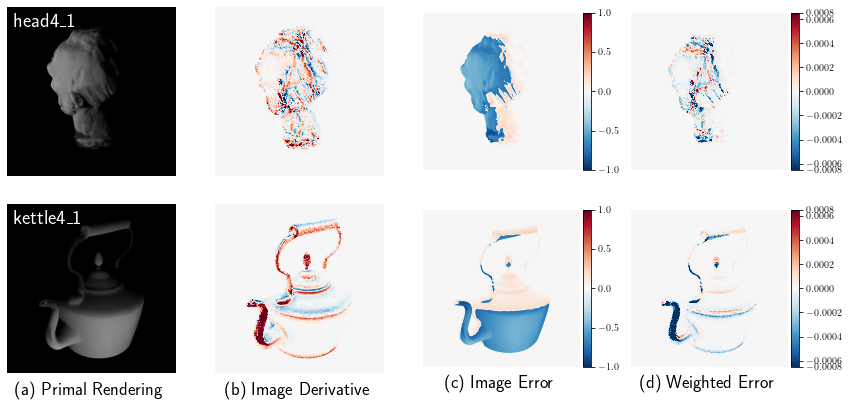

In [1042]:
import os
from PIL import Image
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
delta=5
sigmaT = 80
sigmaT = 50
sigmaT = 100

exp=272
exp2=exp
# exp2=76
grad_dir = "grad2" if exp<36 else "grad3"
suffix="basic"
# suffix="plane"
suffix="all"
# suffix="complex"
grad_dirs = ["grad2",]
scenes = ['cube','plane','cone4','sphere1','cylinder4','pyramid4']
# scenes = ['plane']
scenes = ['head1','kettle1','duck','maneki1','pig1','horse','botijo','cube','plane','cone4','sphere1','cylinder4','pyramid4']
scenes = ['maneki4','head4','kettle4','botijo2'] 
# scenes=['head1','kettle1','duck','maneki1','pig1','horse','botijo']
sensors = np.arange(50)

# scenes = ['maneki4']
# sensors = [1]
# sensors = [2,22]
list_imgs = []
list_grad_fds = []
list_grads = []
list_errors = []
list_fds = []
list_scenes = []

for scene in scenes:
    for sensor in sensors:
        for grad_dir in grad_dirs:
            if exp <= 131:
                grad = f"examples/python/scripts/grad/test_was_v{exp}/{scene}_{sensor}.npy"
                grad_fd = f"examples/python/scripts/grad/test_was_v{exp2}/{scene}_{sensor}_fd.npy"
            else:
                grad = f"examples/python/scripts/grad/test_was_v{exp}/{scene}_{sensor}_{delta}.npy"
                grad_fd = f"examples/python/scripts/grad/test_was_v{exp2}/{scene}_{sensor}_{delta}_fd.npy"
                
            img_error = f"examples/python/scripts/grad/test_was_v{exp2}/{scene}_{sensor}_{delta}_diff.npy"
            fd = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_VaeSub_delta{delta}_FD_nolegend.png"
            img = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_VaeSub_delta{delta}_FD_0.png"
            # fd = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_HeterSub_delta{delta}_FD_nolegend.png"
            # img = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_HeterSub_delta{delta}_FD_0.png"
            if not os.path.exists(grad_fd) or not os.path.exists(img) or not os.path.exists(grad):
                continue
            grad_ = np.load(grad)[...,None]
            grad_fd = np.load(grad_fd)[...,None]
            
            if os.path.exists(img_error):
                img_err = np.load(img_error)
                list_errors.append(img_err)
            else:
                list_errors.append(np.zeros((512,512,3)))
                                   
            img_ = Image.open(img)
            list_grads.append(grad_)
            list_grad_fds.append(grad_fd)
            # list_fds.append(fd_)
            list_imgs.append(img_)
            list_scenes.append((scene,sensor))
print(len(list_imgs))
plt.rcParams['text.usetex'] = True
f, axarr = plt.subplots(nrows=len(list_imgs), ncols=4, figsize=(3*4,len(list_imgs)*3), tight_layout=True)
for idx,(img,fd,grad) in enumerate(zip(list_imgs,list_grad_fds,list_grads)):
    name,sensor = list_scenes[idx]
    # print(idx)
    axarr[idx,0].imshow(img)
    # print(name)
    axarr[idx,0].text(20,17,f"{name}_{sensor}",fontsize=20, color='white', ha='left', va='top')
   
    # thres = 0.006510 #50151
    # cmax = max(fd.max(),abs(fd.min()))
    # print(cmax)
    # cmax = min(cmax,thres)
    # norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)
    # axarr[idx,1].imshow(fd,cmap='RdBu_r',norm=norm)

    thres = 0.0006 #50151   
    # grad = grad / 0.05
    # grad[grad>grad.max()* 0.5] = 0.0
    cmax = max(grad.max(),abs(grad.min()))
    # print(cmax)
    cmax = min(cmax,thres)
    # cmax=thres
    norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)
    axarr[idx,1].imshow(grad,cmap='RdBu_r',norm=norm)
     
    # diff = abs(grad-fd)
    # diff = (list_errors[idx].mean(axis=-1))
    
    diff = -(list_errors[idx][...,1]) # target - ours
    # img_ = np.array(img).mean(axis=-1)
    # diff[img_ !=0] /= img_[img_ != 0]
    # print(img.shape)
    # diff[diff>0] *= 10
    cmax = max(diff.max(),abs(diff.min()))
    norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)
    divider = make_axes_locatable(axarr[idx,2])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    # im = axarr[idx,3].imshow(diff,cmap='viridis') #,norm=norm)
    # diff[diff>0] *= 0.2
    
    im = axarr[idx,2].imshow(diff,cmap='RdBu_r',norm=norm)
    f.colorbar(im, cax=cax, orientation='vertical')
       
    thres = 0.0006510 #50151
    weight = 2* (diff) * grad.squeeze()
    cmax = max(weight.max(),abs(weight.min()))
    cmax = min(cmax,thres)
    norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)
    divider = make_axes_locatable(axarr[idx,3])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    im2 = axarr[idx,3].imshow(weight,cmap='RdBu_r',norm=norm)
    f.colorbar(im2, cax=cax, orientation='vertical')
    print("Parameter gradient: ",weight.mean())
    
    axarr[idx,0].axis('off')
    axarr[idx,1].axis('off')
    axarr[idx,2].axis('off')
    axarr[idx,3].axis('off')
    
# axarr[idx,0].text(0,199,'hi',horizon)
fs = 18
idx = len(list_imgs)-1
axarr[idx,0].text(250,540,f"(a) Primal Rendering",fontsize=fs, ha='center', va='top')
axarr[idx,1].text(250,540,f"(b) Image Derivative",fontsize=fs, ha='center', va='top')
axarr[idx,2].text(250,540,f"(c) Image Error",fontsize=fs, ha='center', va='top')

axarr[idx,3].text(250,540,f"(d) Weighted Error",fontsize=fs, ha='center', va='top')
# axarr[idx,4].text(250,540,f"(e) Weighted Error",fontsize=fs, ha='center', va='top')
plt.show()
f.savefig(f'was_v{exp}_{suffix}_{sigmaT}_{delta}_gradMap.png')
 

In [412]:
np.array(img).mean(axis=-1).min()

0.0

# Figure: Boundary + Interior 

3
fd 0.022128174
(512, 512, 1) (512, 512, 1)
total 0.55050766
fd 0.029175302
(512, 512, 1) (512, 512, 1)
total 0.25213122
fd 0.02819173
(512, 512, 1) (512, 512, 1)
total 0.20959264


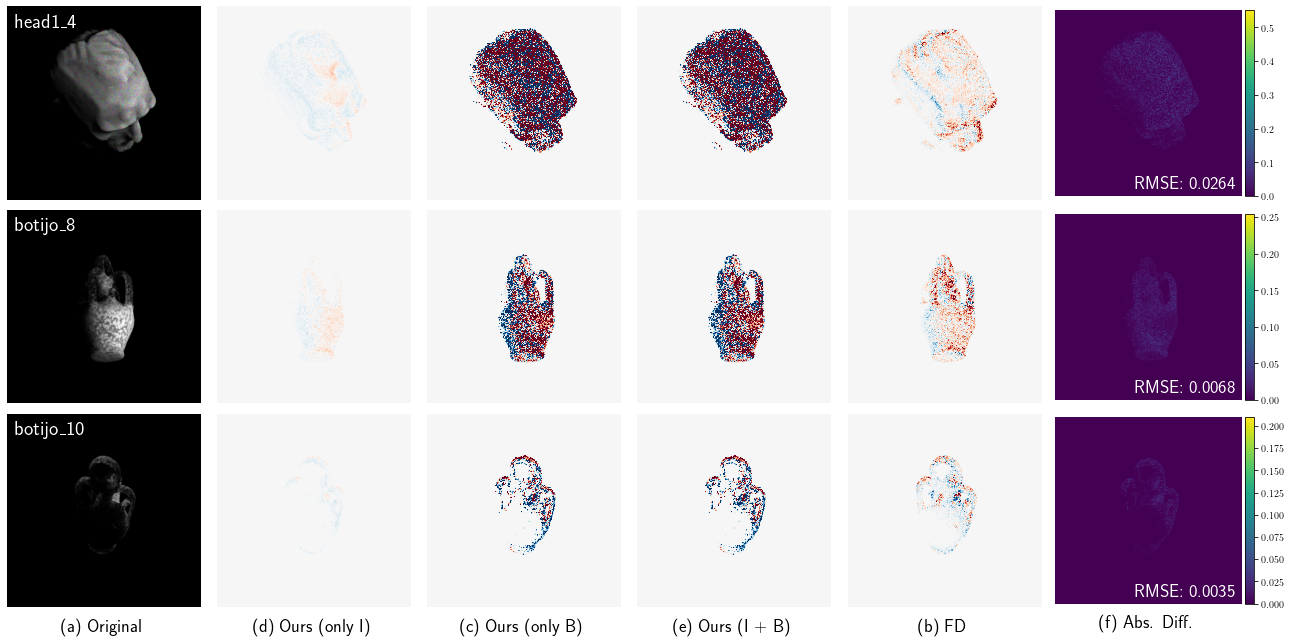

In [99]:
import os
from PIL import Image
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
delta=5
sigmaT = 52
exp=197
exp2=exp
# exp2=76
grad_dir = "grad2" if exp<36 else "grad3"
suffix="basic"
# suffix="plane"
suffix="all"
suffix="complex"
grad_dirs = ["grad2",]
scenes = ['cube','plane','cone4','sphere1','cylinder4',] #'pyramid4']
# scenes = ['plane']
# scenes = ['head1','kettle1','duck','maneki1','pig1','horse','botijo','cube','plane','cone4','sphere1','cylinder4','pyramid4']
scenes=['head1','kettle1','duck','maneki1','pig1','horse','botijo']
sensors = np.arange(50)
# sensors = [2,22]
list_imgs = []
list_grad_fds = []
list_grads = []
list_grads_ints = []
list_fds = []
list_scenes = []

##### Params #############
weight_B = 0.0001 # 0.0001
weight_I =50 # 50
thres = 0.005

# Figure Drawing Params
idx_org = 0
idx_onlyB = 2
idx_onlyI = 1
idx_total=3
idx_FD =4
idx_diff=5
fig_size = 3
fs = 18
##########################

for scene in scenes:
    for sensor in sensors:
        for grad_dir in grad_dirs:
            if exp <= 131:
                grad = f"examples/python/scripts/grad/test_was_v{exp}/{scene}_{sensor}.npy"
                grad_fd = f"examples/python/scripts/grad/test_was_v{exp2}/{scene}_{sensor}_fd.npy"
            else:
                grad = f"examples/python/scripts/grad/test_was_v{exp}/{scene}_{sensor}_{delta}.npy"
                grad_fd = f"examples/python/scripts/grad/test_was_v{exp2}/{scene}_{sensor}_{delta}_fd.npy"
                
            fd = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_VaeSub_delta{delta}_FD_nolegend.png"
            img = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_VaeSub_delta{delta}_FD_0.png"
            grad_int = f"examples/python/scripts/grad/test_was_v{exp}_int/{scene}_{sensor}_{delta}.npy"
            # fd = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_VaeSub_delta{delta}_FD_nolegend.png"
            # img = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_HeterSub_delta{delta}_FD_0.png"
            if not os.path.exists(grad_fd) and not os.path.exists(grad) and not os.path.exists(grad_int):
                continue
            if os.path.exists(grad):
                grad_ = np.load(grad)[...,None]
            else:
                grad_ = np.zeros((512,512,1))
            
            if os.path.exists(grad_fd):
                grad_fd = np.load(grad_fd)[...,None]
            else:
                grad_fd = np.zeros((512,512,1))
            
            if os.path.exists(grad_int):
                grad_int = np.load(grad_int)[...,None]
            else:
                grad_int = np.zeros((512,512,1))
            
            # if os.path.exists(img):
            img_ = Image.open(img)
            # else:
            #     img_ = np.zeros((512,512,3))
            list_grads.append(grad_)
            list_grad_fds.append(grad_fd)
            list_grads_ints.append(grad_int)
            # list_fds.append(fd_)
            list_imgs.append(img_)
            list_scenes.append((scene,sensor))
            
print(len(list_imgs))
plt.rcParams['text.usetex'] = True
f, axarr = plt.subplots(nrows=len(list_imgs), ncols=6, figsize=(fig_size*6,len(list_imgs)*fig_size), tight_layout=True)
for idx,(img,fd,grad,grad_int) in enumerate(zip(list_imgs,list_grad_fds,list_grads,list_grads_ints)):
    name,sensor = list_scenes[idx]
    # print(idx)
    axarr[idx,idx_org].imshow(img)
    # print(name)
    axarr[idx,idx_org].text(20,17,f"{name}_{sensor}",fontsize=20, color='white', ha='left', va='top')
   
    # thres = 0.006510 #50151
    cmax = max(fd.max(),abs(fd.min()))
    print("fd",cmax)
    cmax = min(cmax,thres)
    cmax = thres
    norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)
    axarr[idx,idx_FD].imshow(fd,cmap='RdBu_r',norm=norm)
    
    # thres = 60 #50151
    grad = grad * weight_B
    cmax = max(grad.max(),abs(grad.min()))
    # print(cmax)
    cmax = min(cmax,thres)
    cmax = thres
    norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)
    axarr[idx,idx_onlyB].imshow(grad,cmap='RdBu_r',norm=norm)
    
    # thres = 60 #50151
    grad_int = grad_int * weight_I
    cmax = max(grad_int.max(),abs(grad_int.min()))
    # print("int",cmax)
    cmax = min(cmax,thres)
    cmax = thres
    norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)
    axarr[idx,idx_onlyI].imshow(grad_int,cmap='RdBu_r',norm=norm)
    
    print(grad.shape, grad_int.shape)
    grad_total = grad + grad_int
    cmax = max(grad_total.max(),abs(grad_total.min()))
    print("total",cmax)
    cmax = min(cmax,thres)
    cmax = thres
    norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)
    axarr[idx,idx_total].imshow(grad_total,cmap='RdBu_r',norm=norm)
    
    # thres = 0.6 #50151    
    diff = abs(grad_total-fd)
    # norm = MidpointNormalize(vmin=-diff.max(),vmax=diff.max(),midpoint=0.0)
    divider = make_axes_locatable(axarr[idx,5])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    im = axarr[idx,idx_diff].imshow(diff,cmap='viridis') #,norm=norm)
    rmse =  np.sqrt((diff*diff).mean())
    f.colorbar(im, cax=cax, orientation='vertical')
    axarr[idx,5].text(500,500,f"RMSE: {rmse:.4f}",fontsize=fs ,ha='right', va='bottom',color='white')
    
    axarr[idx,0].axis('off')
    axarr[idx,1].axis('off')
    axarr[idx,2].axis('off')
    axarr[idx,3].axis('off')
    axarr[idx,4].axis('off')
    axarr[idx,5].axis('off')
    
# axarr[idx,0].text(0,199,'hi',horizon)

idx = len(list_imgs)-1
axarr[idx,0].text(250,540,f"(a) Original",fontsize=fs, ha='center', va='top')
axarr[idx,idx_FD].text(250,540,f"(b) FD",fontsize=fs, ha='center', va='top')
axarr[idx,idx_onlyB].text(250,540,f"(c) Ours (only B)",fontsize=fs, ha='center', va='top')
axarr[idx,idx_onlyI].text(250,540,f"(d) Ours (only I)",fontsize=fs, ha='center', va='top')
axarr[idx,idx_total].text(250,540,f"(e) Ours (I + B)",fontsize=fs, ha='center', va='top')
axarr[idx,5].text(250,540,f"(f) Abs. Diff.",fontsize=fs, ha='center', va='top')
plt.show()
f.savefig(f'was_v{exp}_{suffix}_{sigmaT}_{delta}_IandB.png')

# Figure: Comparison with Deng

In [175]:
import os
from PIL import Image
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
delta=5
sigmaT = 52
exp=214
exp2=exp
# exp2=76
grad_dir = "grad2" if exp<36 else "grad3"
suffix="basic"
# suffix="plane"
# suffix="all"
# suffix="complex"
grad_dirs = ["grad2",]
scenes = ['cube','plane','cone4','sphere1','cylinder4',] #'pyramid4']
# scenes = ['plane']
# scenes = ['head1','kettle1','duck','maneki1','pig1','horse','botijo','cube','plane','cone4','sphere1','cylinder4','pyramid4']
# scenes=['head1','kettle1','duck','maneki1','pig1','horse','botijo']
sensors = np.arange(50)
# sensors = [2,22]
list_imgs = []
list_grad_fds = []
list_grads = []
list_grad_fds_deng = []
list_grads_deng = []
list_grads_ints = []
list_fds = []
list_scenes = []

##### Params #############
thres = 0.001

# Figure Drawing Params
idx_ours_FD=0
idx_ours_grad=1
idx_ours_diff=2
idx_deng_FD=3
idx_deng_grad=4
idx_deng_diff=5

fig_size = 3
fs = 18
##########################

for scene in scenes:
    for sensor in sensors:
        for grad_dir in grad_dirs:
            if exp <= 131:
                grad = f"examples/python/scripts/grad/test_was_v{exp}/{scene}_{sensor}.npy"
                grad_fd = f"examples/python/scripts/grad/test_was_v{exp2}/{scene}_{sensor}_fd.npy"
            else:
                grad = f"examples/python/scripts/grad/test_was_v{exp}/{scene}_{sensor}_{delta}.npy"
                grad_fd = f"examples/python/scripts/grad/test_was_v{exp2}/{scene}_{sensor}_{delta}_fd.npy"
                
            img = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_VaeSub_delta{delta}_FD_0.png"
            grad_deng = f"examples/python/scripts/grad/test_was_v{exp}_deng/{scene}_{sensor}_{delta}.npy"
            grad_fd_deng = f"examples/python/scripts/grad/test_was_v{exp2}_deng/{scene}_{sensor}_{delta}_fd.npy"
            
            if not os.path.exists(grad_fd) or not os.path.exists(grad):
                continue
            grad_ = np.load(grad)[...,None]
            grad_fd = np.load(grad_fd)[...,None]
            grad_deng = np.load(grad_deng)[...,None]
            grad_fd_deng = np.load(grad_fd_deng)[...,None]
            
            if os.path.exists(img):
                img_ = Image.open(img)
            else:
                img_ = np.zeros((512,512,3))
            list_grads.append(grad_)
            list_grad_fds.append(grad_fd)
            list_grads_deng.append(grad_deng)
            list_grad_fds_deng.append(grad_fd_deng)
            # list_fds.append(fd_)
            list_imgs.append(img_)
            list_scenes.append((scene,sensor))
print(len(list_imgs))



plt.rcParams['text.usetex'] = True
f, axarr = plt.subplots(nrows=len(list_imgs), ncols=6, figsize=(fig_size*6,len(list_imgs)*fig_size), tight_layout=True)
for idx,(img,fd,grad,fd_deng,grad_deng) in enumerate(zip(list_imgs,list_grad_fds,list_grads,list_grad_fds_deng,list_grads_deng)):
    name,sensor = list_scenes[idx]
    axarr[idx,idx_org].imshow(img)
    axarr[idx,idx_org].text(-20,250,f"{name}_{sensor}",fontsize=20, ha='right', va='center',rotation=90)
   
    # thres = 0.006510 #50151
    cmax = max(fd.max(),abs(fd.min()))
    print("fd",cmax)
    cmax = min(cmax,thres)
    cmax = thres
    norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)
    axarr[idx,idx_ours_FD].imshow(fd,cmap='RdBu_r',norm=norm)
    
    # thres = 60 #50151    
    cmax = max(grad.max(),abs(grad.min()))
    # print(cmax)   
    print("grad",cmax)
    cmax = min(cmax,thres)
    cmax = thres
    norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)
    axarr[idx,idx_ours_grad].imshow(grad,cmap='RdBu_r',norm=norm)
    
    cmax = max(fd_deng.max(),abs(fd_deng.min()))
    print("fd_deng",cmax)
    cmax = min(cmax,thres)
    cmax = thres
    norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)
    axarr[idx,idx_deng_FD].imshow(fd_deng,cmap='RdBu_r',norm=norm)
    
    # thres = 60 #50151
    cmax = thres
    norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)
    axarr[idx,idx_deng_grad].imshow(grad_deng,cmap='RdBu_r',norm=norm)
    
    # thres = 0.6 #50151    
    diff = abs(grad-fd)
    # norm = MidpointNormalize(vmin=-diff.max(),vmax=diff.max(),midpoint=0.0)
    divider = make_axes_locatable(axarr[idx,idx_ours_diff])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    im = axarr[idx,idx_ours_diff].imshow(diff,cmap='viridis') #,norm=norm)
    rmse =  np.sqrt((diff*diff).mean())
    f.colorbar(im, cax=cax, orientation='vertical')
    axarr[idx,idx_ours_diff].text(500,500,f"RMSE: {rmse:.4f}",fontsize=fs ,ha='right', va='bottom',color='white')
        
    diff = abs(grad_deng-fd_deng)
    # norm = MidpointNormalize(vmin=-diff.max(),vmax=diff.max(),midpoint=0.0)
    divider = make_axes_locatable(axarr[idx,idx_deng_diff])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    im = axarr[idx,idx_deng_diff].imshow(diff,cmap='viridis') #,norm=norm)
    rmse =  np.sqrt((diff*diff).mean())
    f.colorbar(im, cax=cax, orientation='vertical')
    axarr[idx,idx_deng_diff].text(500,500,f"RMSE: {rmse:.4f}",fontsize=fs ,ha='right', va='bottom',color='white')
    
    axarr[idx,0].axis('off')
    axarr[idx,1].axis('off')
    axarr[idx,2].axis('off')
    axarr[idx,3].axis('off')
    axarr[idx,4].axis('off')
    
idx = len(list_imgs)-1
axarr[idx,idx_ours_FD].text(250,540,f"(a) FD (Ours)",fontsize=fs, ha='center', va='top')
axarr[idx,idx_ours_grad].text(250,540,f"(b) Ours (I+B)",fontsize=fs, ha='center', va='top')
axarr[idx,idx_ours_diff].text(250,540,f"(c) Abs. Diff (Ours)",fontsize=fs, ha='center', va='top')
axarr[idx,idx_deng_FD].text(250,540,f"(d) FD (Deng)",fontsize=fs, ha='center', va='top')
axarr[idx,idx_deng_grad].text(250,540,f"(e) Deng",fontsize=fs, ha='center', va='top')
axarr[idx,idx_deng_diff].text(250,540,f"(f) Abs. Diff (Deng)",fontsize=fs, ha='center', va='top')
plt.show()
f.savefig(f'was_v{exp}_{suffix}_{sigmaT}_{delta}_DengCompare.png')
 

FileNotFoundError: [Errno 2] No such file or directory: 'examples/python/scripts/grad/test_was_v214_deng/cylinder4_1_5.npy'

## Kernel Function

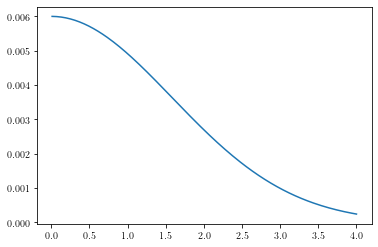

In [1107]:
import math
import numpy as np

import scipy.stats as stats
def weight(r_):
    maxDist = 0.02

    sigma = 0.006 #/ maxDist
    
    r = r_  / maxDist # / 15.0 
    a =3
    B=0
    D = 1/sigma*(1-np.exp(-r*r / sigma ))**a
    
    w = 1/sigma *(1-np.exp(-r*r/ sigma)) #*maxDist) #sigma)
    w = 1/(B+D)
    w = sigma *np.exp(-r_*r_ / 5) #*maxDist) #sigma)
    #stats.norm.pdf(r**3,0,sigma)
    return w
x = np.linspace(0.010, 4, 200)

fig, ax = plt.subplots()
y = weight(x)
plt.plot(x,y)


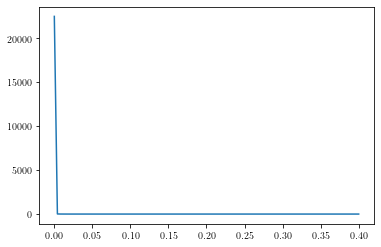

In [620]:
x = np.linspace(0.0001, 0.4, 100)

fig, ax = plt.subplots()
y = weight(x)
plt.plot(x,y)


In [32]:
%matplotlib ipympl
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

import mpl_interactions.ipyplot as iplt

### Check distribution

In [915]:
# data = img.reshape(-1,1)

import os
from PIL import Image
import numpy as np

grad1 = f"examples/python/scripts/grad/test_was_v0/cone4_4.npy"
scene="cone4"
sensor=1
exp=81
grad1 = f"examples/python/scripts/grad/test_was_v{exp}/{scene}_{sensor}.npy"
grad1_gt = f"examples/grad2/{scene}_sensor{sensor}_sigma_t[[52, 52, 52]]_param2_VaeSub_delta5_FD_nolegend.png"
grad1_img = f"examples/grad2/{scene}_sensor{sensor}_sigma_t[[52, 52, 52]]_param2_VaeSub_delta5_FD_1.png"
      
img = np.load(grad1)[...,None]
img_gt = Image.open(grad1_gt)
img_img = Image.open(grad1_img)

img *= 1000
img.shape
img[img!=0]
print(img.max())
print(img.min())
data = []
for d in img.reshape(-1,1):
    if d!= 0:
        data.append(d[0])
# data

75.99339634180069
-83.28702300786972


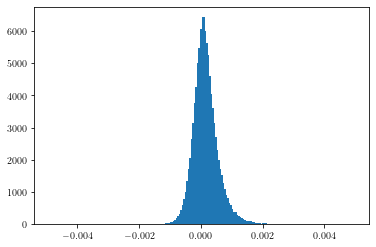

In [922]:
# max_ = 0.0000001 #img.max() - 0.8
# min_ = #img.min() + 0.2

# clip
thres = 0.005
data_= []
for d in data:
    if abs(d) < thres:
        data_.append(d)
data = data_
plt.hist(data,bins=200,) #range=(min_,max_))
plt.show() 

In [736]:
img.std()

0.0003346262